## 3-body problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

In /Users/anaderi/miniconda/envs/py3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/anaderi/miniconda/envs/py3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/anaderi/miniconda/envs/py3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
def derivative(X, t):

    Y[:6] = X[6:]

    r34, r35, r45 = X[2:4]-X[0:2], X[4:6]-X[0:2], X[4:6]-X[2:4]
    thing34 = ((r34**2).sum())**-1.5
    thing35 = ((r35**2).sum())**-1.5
    thing45 = ((r45**2).sum())**-1.5

    Y[6:8]   =  r34*thing34*m4 + r35*thing35*m5
    Y[8:10]  =  r45*thing45*m5 - r34*thing34*m3
    Y[10:12] = -r35*thing35*m3 - r45*thing45*m4

    return Y

In [3]:
# Pythagorean Three Body Problem
m3, m4, m5 = 3.0, 4.0, 5.0


x0 = [1.0, 3.0] + [-2.0, -1.0] + [1.0, -1.0]
v0 = [0.0, 0.0] + [ 0.0,  0.0] + [0.0,  0.0] 
X0 = np.array(x0 + v0)

t = np.linspace(0, 60,  60001)

Y = np.zeros_like(X0)

tol  = 1E-9 # with default method higher precision causes failure
hmax = 1E-04

In [5]:
solution, info = odeint(derivative, X0, t, rtol=tol, atol=tol,
                      hmax=hmax, full_output=True)



In [6]:
def plot_solution(solution):
    xy3, xy4, xy5 = solution.T[:6].reshape(3,2,-1)
    paths         = [xy3, xy4, xy5]
    plt.figure(figsize=(10,12))
    plt.subplot(2, 1, 1)
    for x, y in paths:
        plt.plot(x, y)
    for x, y in paths:
        plt.plot(x[:1], y[:1], 'ok')
    plt.xlim(-6, 6)
    plt.ylim(-4, 4)
    # plt.title("This result is WRONG!", fontsize=16)
    plt.subplot(4,1,3)
    for x, y in paths:
        plt.plot(t, x)
    plt.ylim(-6, 4)
    plt.subplot(4,1,4)
    for x, y in paths:
        plt.plot(t, y)
    plt.ylim(-6, 4)
    plt.show()

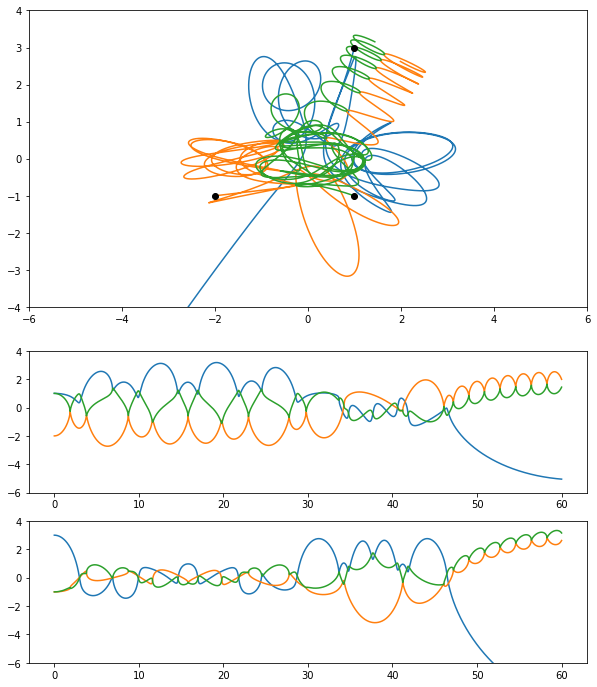

In [7]:
plot_solution(solution)

### Task
Try comparing the trajectories from the following initial conditions
-       {1.,3.}                 {-2.,-1.}               {1.,-1.}
-      {2.46917,-1.22782}      {-2.2782,-0.20545}      {0.34106,0.901049}
-      {0.77848,0.141392}      {-2.02509,0.0972194}    {1.15299,-0.162611}
